### Exercise 1: Monte Carlo Integration

In [1]:
#(i):
# Estimate volume of hypersphere of unit radius in 10d
# compare to exact value of (pi^5)/(5!)

# Volume of hypersphere with Monte Carlo
import numpy as np
import numpy.random as rn

def f(x):
    return 1024/(1+x*x)

exact_value = (np.pi**5)/(np.math.factorial(5))

nsteps = 10000
counter_inside = 0
counter_total = 0


for i in range(nsteps):

    for z in range(11):
        counter_total += 1
        x = 10*rn.random()
        y = 1024*rn.random()
#         print('y', y)
#         print('x', x)
#         print('sqrt', np.sqrt(x**2 + y**2))
    # check if this point is inside the hypersphere
        if np.sqrt(x**2 + y**2) < 1:
            counter_inside += 1

# the number of points under the curve compared to the total number of points
# is the same as the area under the curve (integral) compared to the area of the box
area_box = 1024*1
integral = counter_inside/nsteps*area_box
print("The integral equals: ", integral)
print("Exact value should be: ", exact_value)
print("Relative error w.r.t. exact value: ", abs(integral-exact_value)/exact_value)

The integral equals:  0.512
Exact value should be:  2.550164039877345
Relative error w.r.t. exact value:  0.7992286017708


### Exercise 2: Importance Sampling

In [2]:
#(i):
# function to integrate from 0 to inf: x^3/2 e^-x 
# exact value is 3(sqrt(pi)/4)
import numpy as np
import numpy.random as rn

def f(x):
    return (x**(3/2)) * (np.exp(-x))

def p(x):
    return np.exp(-x)

N = 10000

integral = 0

exactValue = (3 * np.sqrt(np.pi)) / 4

for i in range(N):
    
    x = rn.exponential()
    
    integral += f(x)/p(x)
    
integral = integral/N
print("The integral equals: ", integral)
print("Exact value should be: ", exactValue)
print("Relative error w.r.t. exact value: ", abs(integral-exactValue)/exactValue)

The integral equals:  1.3481684645073977
Exact value should be:  1.329340388179137
Relative error w.r.t. exact value:  0.014163472723529006


<ipython-input-3-457b90911489>:11: RuntimeWarning: divide by zero encountered in true_divide
  return 1/np.sqrt(28*x)


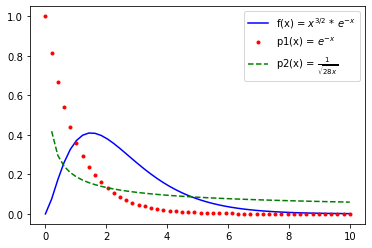

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**(3/2)) * (np.exp(-x))

def p1(x):
    return np.exp(-x)

def p2(x):
    return 1/np.sqrt(28*x)

x_vals = np.linspace(0, 10)

plt.plot(x_vals, f(x_vals), 'b-', label = 'f(x) = ' + r'$x^{3/2}$ * $e^{-x}$')
plt.plot(x_vals, p1(x_vals), 'r.', label = 'p1(x) = ' + r'$e^{-x}$')
plt.plot(x_vals, p2(x_vals), 'g--', label = 'p2(x) = ' + r'$\frac{1}{\sqrt{28x}}$')
plt.legend()
plt.show()

In [4]:
#(ii):
# same as above but choose a different p(x)

# function to integrate from 0 to inf: x^3/2 e^-x 
# exact value is 3(sqrt(pi)/4)
import numpy as np
import numpy.random as rn

def f(x):
    return (x**(3/2)) * (np.exp(-x))

def p(x):
    return 1/np.sqrt(28*x)

N = 10000

integral = 0

exactValue = (3 * np.sqrt(np.pi)) / 4

for i in range(N):
    
    x = rn.exponential()

    integral += f(x)/p(x)

integral = integral/N
print("The integral equals: ", integral)
print("Exact value should be: ", exactValue)
print("Relative error w.r.t. exact value: ", abs(integral-exactValue)/exactValue)

The integral equals:  1.3265427634917013
Exact value should be:  1.329340388179137
Relative error w.r.t. exact value:  0.0021045209431030396


#### Explain why the chosen p(x) is suitable
The different p(x) is suitable because it follows the same general curve as f(x). By multiplying the x under the square root by a constant changed where the curve fell so 28 put it in the best place for this function.

In [5]:
#(iii): Extra credit
# repeat (i) using Markov chain Monte Carlo

def p(x): 
    return np.exp(-x)

nsteps = 10000
x = 0.5
integral = 0
exactValue = (3 * np.sqrt(np.pi)) / 4

for i in range(nsteps):
    
    # changing the value of x by adding a random float between -0.05 and 0.05 to old x
    # how we choose the new x is our decision, this is just one option
    xchange = rn.rand()*0.1-0.05
    xnew = x + xchange
    
    # careful about leaving the integration domain!
    # if this happens, we will just reenter on the other side
    if xnew < 0: xnew += 1
    
    # Metropolis algorithm
    if p(xnew)/p(x) >= 1: 
        x = xnew
    else: 
        chance = rn.rand()
        if chance <= p(xnew)/p(x): 
            x = xnew
    # sampling the integral
    integral += f(x)/p(x)

# because we are only generating values of x between 0 and 1
# we need to recalculate the norm of p(x), namely integral of p(x) between 0 and 1
norm = 1-np.exp(-1)
integral = integral/nsteps*norm

print("The integral equals: ", integral)
print("Exact value should be: ", exactValue)
print("Relative error w.r.t. exact value: ", abs(integral-exactValue)/exactValue)

The integral equals:  0.9249687244783775
Exact value should be:  1.329340388179137
Relative error w.r.t. exact value:  0.3041897073891265


### Exercise 3: Ising Model

In [6]:
#(i):
# J = 1, h = 0, T = 1, 5x5 grid
# perform 10^6 Monte Carlo steps, but only collect data during last 10^4 steps

import numpy as np
import matplotlib.pyplot as plt

# define the system parameters

L = 10      # size of lattice in each direction
J = 1       # interaction parameter
h = 0       # magnetic field
T = 1       # temperature
beta = 1/T  # set k_B = 1


# define the state of the system: LxL grid with (initially) a random spin in each cell
config = 2*np.random.randint(2, size=(L,L))-1

# energy of a given state
def energy():  
    # elegant way of writing the sum over all nearest neighbors in the grid
    interaction = -J*( np.sum(config[0:L-1,:]*config[1:L,:]) +     # contributions of top/bottom neighbors
                       np.sum(config[:,0:L-1,]*config[:,1:L]))     # contributions of left/right neighbors
    
    magnetic = -h*np.sum(config)
    return interaction + magnetic

current_energy = energy()

# magnetization of a given state
def magnetization():
    return np.sum(config)/L/L

# Monte Carlo update using Metropolis algorithm
def update():
    
    global config, current_energy    # we want to be able to change the configuration
    
    # choose a random cell in the grid
    cell = np.random.randint(L, size=2)
    i = cell[0]
    j = cell[1]
    
    # calculate the current contribution of this cell to the total energy
    energy_cell = 0
    # be careful with the boundary
    if i != 0:   energy_cell += config[i-1, j]   # left neighbor
    if i != L-1: energy_cell += config[i+1, j]   # right neighbor
    if j != 0:   energy_cell += config[i, j-1]   # top neighbor
    if j != L-1: energy_cell += config[i, j+1]   # bottom neighbor
        
    # the current contribution to the interaction energy is: -J*energy_cell*config[i,j]
    # if we flip the spin, i.e. change config[i,j] to -config[i,j], the new contribution will also change sign
    # this means that overall:
    
    energy_difference = 2*J*energy_cell*config[i,j]
    
    # additional contribution due to the magnetic field
    energy_difference += 2*h*config[i,j]
    
    # check if update is accepted
    accept = False
    if energy_difference<0: 
        accept = True    # always accept updates that decrease the energy
    else:
        prob = np.exp(-beta*energy_difference)
        # standard to calculate event given a probability (see example biasedCoin() in Section 3.1.3)
        rand = np.random.rand()
        if rand<prob:
            accept = True
            
    # if update is accepted we flip the spin
    if accept == True:
        config[i, j] = -config[i, j]
        current_energy += energy_difference
    
    # keep track of the acceptance probability
    return accept

# run the simulation
steps = int(1e6)
magnetization_results = []
energy_results = []
accept_results = []
accept_counter = 0

for counter in range(steps):

    accept_counter += update()
    # keep track of acceptance rates in blocks of 100 steps
    if counter%100 == 99:
        accept_results.append(accept_counter/100)
        accept_counter=0
        
    if counter >= (1e4):
        energy_results.append(current_energy)
        magnetization_results.append(magnetization())

print('Average Magnetization @ T = 1:', np.mean(magnetization_results))

Average Magnetization @ T = 1: 0.993811818181818


In [7]:
# J = 1, h = 0, T = 1, 5x5 grid
# perform 10^6 Monte Carlo steps, but only collect data during last 10^4 steps

import numpy as np
import matplotlib.pyplot as plt

# define the system parameters

L = 10      # size of lattice in each direction
J = 1       # interaction parameter
h = 0       # magnetic field
T = 10       # temperature
beta = 1/T  # set k_B = 1


# define the state of the system: LxL grid with (initially) a random spin in each cell
config = 2*np.random.randint(2, size=(L,L))-1

# energy of a given state
def energy():  
    # elegant way of writing the sum over all nearest neighbors in the grid
    interaction = -J*( np.sum(config[0:L-1,:]*config[1:L,:]) +     # contributions of top/bottom neighbors
                       np.sum(config[:,0:L-1,]*config[:,1:L]))     # contributions of left/right neighbors
    
    magnetic = -h*np.sum(config)
    return interaction + magnetic

current_energy = energy()

# magnetization of a given state
def magnetization():
    return np.sum(config)/L/L

# Monte Carlo update using Metropolis algorithm
def update():
    
    global config, current_energy    # we want to be able to change the configuration
    
    # choose a random cell in the grid
    cell = np.random.randint(L, size=2)
    i = cell[0]
    j = cell[1]
    
    # calculate the current contribution of this cell to the total energy
    energy_cell = 0
    # be careful with the boundary
    if i != 0:   energy_cell += config[i-1, j]   # left neighbor
    if i != L-1: energy_cell += config[i+1, j]   # right neighbor
    if j != 0:   energy_cell += config[i, j-1]   # top neighbor
    if j != L-1: energy_cell += config[i, j+1]   # bottom neighbor
        
    # the current contribution to the interaction energy is: -J*energy_cell*config[i,j]
    # if we flip the spin, i.e. change config[i,j] to -config[i,j], the new contribution will also change sign
    # this means that overall:
    
    energy_difference = 2*J*energy_cell*config[i,j]
    
    # additional contribution due to the magnetic field
    energy_difference += 2*h*config[i,j]
    
    # check if update is accepted
    accept = False
    if energy_difference<0: 
        accept = True    # always accept updates that decrease the energy
    else:
        prob = np.exp(-beta*energy_difference)
        # standard to calculate event given a probability (see example biasedCoin() in Section 3.1.3)
        rand = np.random.rand()
        if rand<prob:
            accept = True
            
    # if update is accepted we flip the spin
    if accept == True:
        config[i, j] = -config[i, j]
        current_energy += energy_difference
    
    # keep track of the acceptance probability
    return accept

# run the simulation
steps = int(1e6)
magnetization_results = []
energy_results = []
accept_results = []
accept_counter = 0

for counter in range(steps):

    accept_counter += update()
    # keep track of acceptance rates in blocks of 100 steps
    if counter%100 == 99:
        accept_results.append(accept_counter/100)
        accept_counter=0
        
    if counter >= (1e4):
        energy_results.append(current_energy)
        magnetization_results.append(magnetization())

print('Average Magnetization @ T = 10:', np.mean(magnetization_results))

Average Magnetization @ T = 10: 5.47070707070706e-05


#### Explain physical significance of results

The results of the two cells above is that the higher the temperature, the lower the average magnetization of the system.

In [8]:
#(ii): Extra credit
# same as above but make boundary conditions periodic

# J = 1, h = 0, T = 1, 5x5 grid
# perform 10^6 Monte Carlo steps, but only collect data during last 10^4 steps

import numpy as np
import matplotlib.pyplot as plt

# define the system parameters

L = 10      # size of lattice in each direction
J = 1       # interaction parameter
h = 0       # magnetic field
T = 1       # temperature
beta = 1/T  # set k_B = 1


# define the state of the system: LxL grid with (initially) a random spin in each cell
config = 2*np.random.randint(2, size=(L,L))-1

# energy of a given state
def energy():  
    # elegant way of writing the sum over all nearest neighbors in the grid
    interaction = -J*( np.sum(config[0:L-1,:]*config[1:L,:]) +     # contributions of top/bottom neighbors
                       np.sum(config[:,0:L-1,]*config[:,1:L]))     # contributions of left/right neighbors
    
    magnetic = -h*np.sum(config)
    return interaction + magnetic

current_energy = energy()

# magnetization of a given state
def magnetization():
    return np.sum(config)/L/L

# Monte Carlo update using Metropolis algorithm
def update():
    
    global config, current_energy    # we want to be able to change the configuration
    
    # choose a random cell in the grid
    cell = np.random.randint(L, size=2)
    i = cell[0]
    j = cell[1]
    
    # calculate the current contribution of this cell to the total energy
    energy_cell = 0
    # be careful with the boundary
    if i < 0:   energy_cell += config[i-1, j]   # left neighbor
    if i > L-1: energy_cell += config[i+1, j]   # right neighbor
    if j < 0:   energy_cell += config[i, j-1]   # top neighbor
    if j > L-1: energy_cell += config[i, j+1]   # bottom neighbor
        
    # the current contribution to the interaction energy is: -J*energy_cell*config[i,j]
    # if we flip the spin, i.e. change config[i,j] to -config[i,j], the new contribution will also change sign
    # this means that overall:
    
    energy_difference = 2*J*energy_cell*config[i,j]
    
    # additional contribution due to the magnetic field
    energy_difference += 2*h*config[i,j]
    
    # check if update is accepted
    accept = False
    if energy_difference<0: 
        accept = True    # always accept updates that decrease the energy
    else:
        prob = np.exp(-beta*energy_difference)
        # standard to calculate event given a probability (see example biasedCoin() in Section 3.1.3)
        rand = np.random.rand()
        if rand<prob:
            accept = True
            
    # if update is accepted we flip the spin
    if accept == True:
        config[i, j] = -config[i, j]
        current_energy += energy_difference
    
    # keep track of the acceptance probability
    return accept

# run the simulation
steps = int(1e6)
magnetization_results = []
energy_results = []
accept_results = []
accept_counter = 0

for counter in range(steps):

    accept_counter += update()
    # keep track of acceptance rates in blocks of 100 steps
    if counter%100 == 99:
        accept_results.append(accept_counter/100)
        accept_counter=0
        
    if counter >= (1e4):
        energy_results.append(current_energy)
        magnetization_results.append(magnetization())

print('Average Magnetization @ T = 1 with periodic boundaries:', np.mean(magnetization_results))

Average Magnetization @ T = 1 with periodic boundaries: -0.0019423434343434343
